# Исследовательский анализ сервиса аренды самокатов *GoFast*

**Описание проекта:**
Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверем некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Описание данных:**
В основных данных есть информация о пользователях, их поездках и подписках.<br>
<br>Пользователи — users_go.csv
- *user_id*	уникальный идентификатор пользователя<br>
- *name*	имя пользователя<br>
- *age*	возраст<br>
- *city*	город<br>
- *subscription_type*	тип подписки (free, ultra)<br>
<br>Поездки — rides_go.csv<br>
- *user_id*	уникальный идентификатор пользователя<br>
- *distance*	расстояние, которое пользователь проехал в текущей сессии (в метрах)<br>
- *duration*	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»<br>
- *date*	дата совершения поездки<br>
<br>Подписки — subscriptions_go.csv<br>
- *subscription_type*	тип подписки<br>
- *minute_price*	стоимость одной минуты поездки по данной подписке<br>
- *start_ride_price*	стоимость начала поездки<br>
- *subscription_fee*	стоимость ежемесячного платежа<br>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math

#### Шаг 1. Загрузка данных

In [3]:
data1 = pd.read_csv('/datasets/users_go.csv')
display(data1.head(10))
display(data1.info())
display(data1.shape)
display(data1.isna().sum())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

(1565, 5)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [4]:
data2 = pd.read_csv('/datasets/rides_go.csv')
display(data2.head(10))
display(data2.info())
display(data2.shape)
display(data2.isna().sum())

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

(18068, 4)

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [5]:
data3 = pd.read_csv('/datasets/subscriptions_go.csv')
display(data3.head(10))
display(data3.info())
display(data3.shape)
display(data3.isna().sum())

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

(2, 4)

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Вывод:** <br>
- В датасетах отсутствуют пропуски.<br>
- Необходимо перевести столбец с датой в нужный формат.<br>
- Проверить данные на наличие дубликатов.

#### Шаг 2. Предобработка данных

In [6]:
data2['date'] = pd.to_datetime(data2['date'], format='%Y-%m-%d')

In [7]:
data2['month'] = data2['date'].dt.month

In [8]:
data1.duplicated().sum()

31

In [9]:
data1 = data1.drop_duplicates()
data1 = data1.reset_index(drop=True)

In [10]:
data2.duplicated().sum()

0

In [11]:
data3.duplicated().sum()

0

**Вывод:**<br>
Дубликаты устранены, столбец с датой привели к нужному формату и добавили столбец с номером месяца.

#### Шаг 3. Исследовательский анализ данных

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

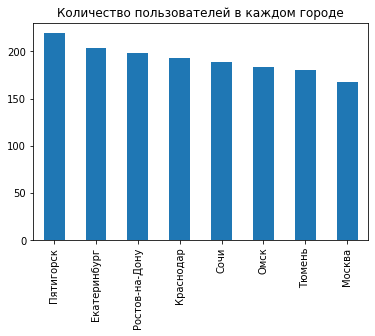

In [12]:
data1['city'].value_counts().plot(kind='bar');
plt.title('Количество пользователей в каждом городе');
data1['city'].value_counts()

**Вывод:**<br>
В представленной выборке больше всего пользователей находятся в городе Пятигорск, аж целых 219 человека. Примечательно, что город представленный меньше всех - Москва, всего 168 человек в выборке.

Пользователей без подписки: 54.4%
Пользователей c подпиской: 45.6%


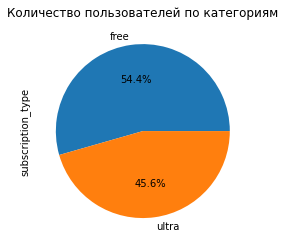

In [13]:
data1['subscription_type'].value_counts().plot(kind='pie', autopct='%.1f%%');
plt.title('Количество пользователей по категориям');
print(f'Пользователей без подписки:', '54.4%')
print(f'Пользователей c подпиской:', '45.6%')

**Вывод:**<br>
В представленной выборке пользователей без подписки больше, чем пользователей с подпиской почти на 10%. Соотношение 54.4% к 45.6%

Минимальный возраст пользователей: 12
Максимальный возраст пользователей: 43


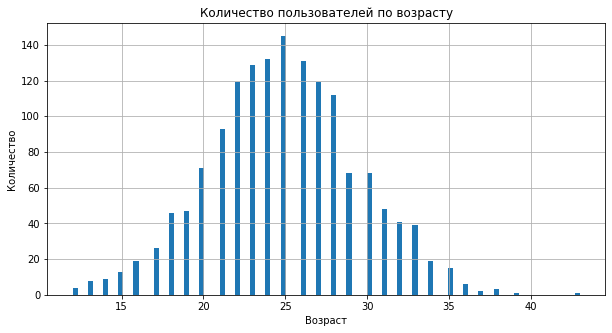

In [14]:
data1['age'].hist (bins= 100, figsize = (10,5));
plt.title('Количество пользователей по возрасту');
plt.ylabel('Количество');
plt.xlabel('Возраст');
print(f'Минимальный возраст пользователей:', data1['age'].min())
print(f'Максимальный возраст пользователей:', data1['age'].max())

**Вывод:**<br>
В представленной выборке возраст пользователей распределен нормально с центром у значения - 25 лет (около 143 пользователей).<br>Разброс - от 12 до 43 лет. Представленные пользователи это молодые люди не старше 43 лет.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

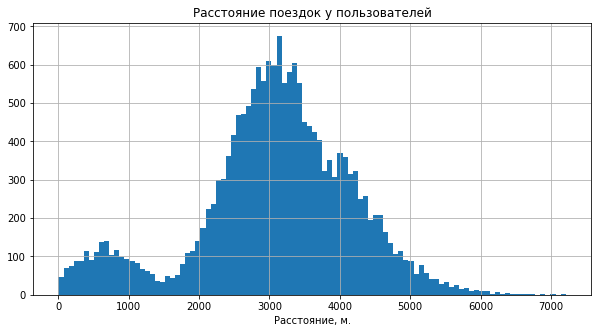

In [15]:
data2['distance'].hist(bins=100, figsize = (10,5))
plt.title('Расстояние поездок у пользователей');
plt.xlabel('Расстояние, м.');
data2['distance'].describe()

**Вывод:**<br>
В представленной выборке расстояние, которое пользователь преодолел за одну поездку, распределено близко к нормальному с центром у значения - 3133 метров (около 660 поездок из всех представленных). Минимальное преодоленное расстояние - 85 метров. Максимальное - 7211 метров. Межквартильный размах - от 2543 метров до 3776 метров, что говорит нам о том, что в основном пользователи предпочитали использовать самокат для преодоления средних дистанций.

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

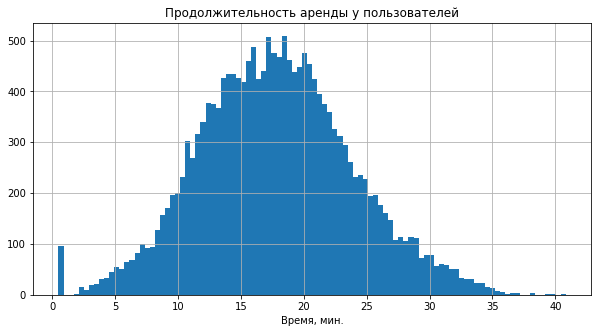

In [16]:
data2['duration'].hist(bins=100, figsize = (10,5))
plt.title('Продолжительность аренды у пользователей');
plt.xlabel('Время, мин.');
data2['duration'].describe()

**Вывод:**<br>
Если отсечь значения близкие к нулю, около 100 наблюдений с продолжительностью поездки в 50 секунд (это могли быть поездки на очень короткие дистанции, либо человек передумал пользоваться самокатом), в представленной выборке продолжительность поездок распределена нормально с центром у значения - 17м 45с (чуть больше 500 поездок из представленных). Межквартильный разброс - от 13м 35с до 21м 40с. Максимальное время одной поездки - 40м 45с.

#### Шаг 4. Объединение данных

In [17]:
data4=data1.merge(data2, on='user_id', how='left')
data4=data4.query('duration > 1.0')
data4

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


In [18]:
data5 = data4.loc[data4['subscription_type'] == 'ultra']
data6 = data4.loc[data4['subscription_type'] == 'free']

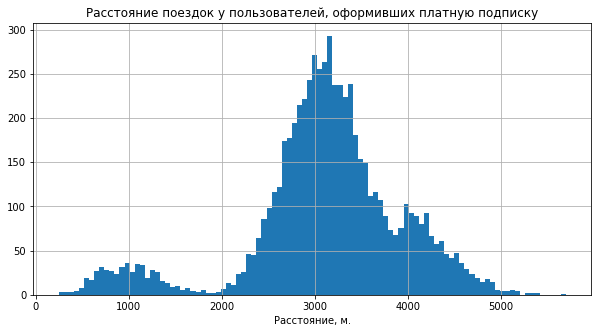

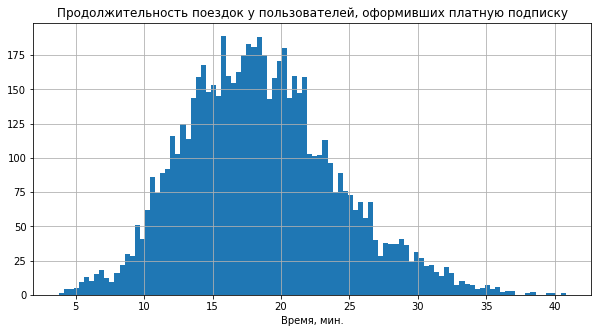

In [19]:
data5['distance'].hist(bins=100, figsize = (10,5))
plt.title('Расстояние поездок у пользователей, оформивших платную подписку');
plt.xlabel('Расстояние, м.');
plt.show()
data5['duration'].hist(bins=100, figsize = (10,5))
plt.title('Продолжительность поездок у пользователей, оформивших платную подписку');
plt.xlabel('Время, мин.');

**Вывод:**<br>
Среднее расстояние у пользователей, оформивших платную подписку, - 3100 метров (почти 300 пользователей). Среднее время поездки - около 18 минут (чуть более 175 пользователей).

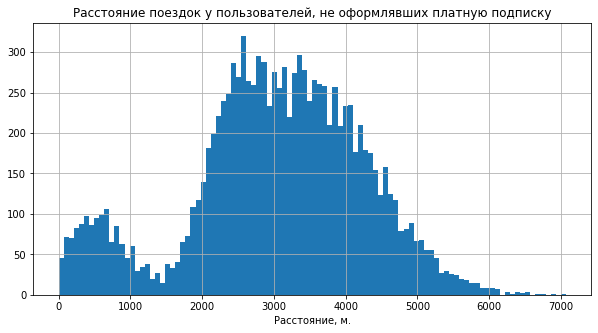

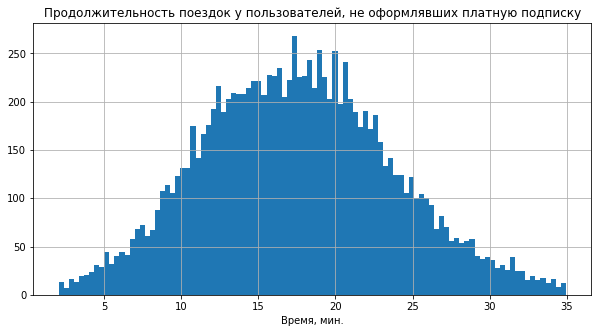

In [20]:
data6['distance'].hist(bins=100, figsize = (10,5))
plt.title('Расстояние поездок у пользователей, не оформлявших платную подписку');
plt.xlabel('Расстояние, м.');
plt.show()
data6['duration'].hist(bins=100, figsize = (10,5))
plt.title('Продолжительность поездок у пользователей, не оформлявших платную подписку');
plt.xlabel('Время, мин.');

**Вывод:**<br>
Среднее расстояние у пользователей, не оформлявших платную подписку, - 3000 метров (почти 300 пользователей). Среднее время поездки - около 17-18 минут (чуть более 175 пользователей).

**Общий вывод:**<br>
Данные на графиках распределены приблизительно одинаково, что у пользователей оформивших подписку, что у пользователей без подписки.

#### Шаг 5. Подсчёт выручки

In [21]:
data4_pivot = data4.pivot_table(index=['user_id', 'month'],
                  values=['distance', 'duration', 'name', 'subscription_type'],
                  aggfunc={'distance':'sum', 'duration':'sum', 'name':'count', 'subscription_type': 'min'})
data4_pivot.columns = ['total_distance', 'total_duration', 'trip_count', 'subscription_type']

In [22]:
data4_pivot['total_duration'] = round(data4_pivot['total_duration'], 0)

In [23]:
def money(row):
    total_distance = row['total_distance']
    total_duration = row['total_duration']
    trip_count = row['trip_count']
    subscription_type = row['subscription_type']
   
    if subscription_type == 'ultra':
        return total_duration * 6 + 199
    if subscription_type == 'free':
        return total_duration * 8 + trip_count * 50

In [24]:
data4_pivot['money'] = data4_pivot.apply(money, axis=1)

In [25]:
data4_pivot

total_distance  total_duration  trip_count subscription_type  \
user_id month                                                                 
1       1         7027.511294            41.0           2             ultra   
        4          754.159807             6.0           1             ultra   
        8         6723.470560            45.0           2             ultra   
        10        5809.911100            32.0           2             ultra   
        11        7003.499363            53.0           3             ultra   
...                       ...             ...         ...               ...   
1534    6         3409.468534            25.0           2              free   
        8         7622.453034            47.0           2              free   
        9         4928.173852            23.0           1              free   
        11       13350.015305            76.0           4              free   
        12        2371.711192            16.0           1              free   

               money  
user_id month         
1       1      445.0  
        4      235.0  
        8      469.0  
        10     391.0  
        11     517.0  
...              ...  
1534    6      300.0  
        8      476.0  
        9      234.0  
        11     808.0  
        12     178.0  

[11300 rows x 5 columns]

#### Шаг 6. Проверка гипотез

*Тратят ли пользователи с подпиской больше времени на поездки?* <br>
Проверим гипотезы, что <br>
H0 : μ1 = μ2   и    H1 : μ1 > μ2,   где μ1 - пользователи с подпиской, а μ2 - пользователи без подписки

In [27]:
alpha = 0.05
results = st.ttest_ind(data5['duration'], data6['duration'], alternative = 'greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.704468074453899e-28
Отвергаем нулевую гипотезу


In [28]:
print()    
print('Средняя продолжительность аренды у пользователей с подпиской:',
      round(data5['duration'].mean(), 2), 'минут, а у пользователей без подписки',
      round(data6['duration'].mean(), 2), 'минут')
print()
print('В среднем пользователи с подпиской арендуют самокат на',
      round(round(data5['duration'].mean(), 2) - round(data6['duration'].mean(), 2), 2),
      'минут больше, чем пользователи без подписки')


Средняя продолжительность аренды у пользователей с подпиской: 18.54 минут, а у пользователей без подписки 17.53 минут

В среднем пользователи с подпиской арендуют самокат на 1.01 минут больше, чем пользователи без подписки


*Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров?*<br>
Проверим гипотезы, что <br>
H0 : μ1 = 3130   и    H1 : μ1 < 3130,   где μ1 - пользователи с подпиской

In [29]:
optimal_distance = 3130
alpha = 0.05
results = st.ttest_1samp(
    data5['distance'],
    optimal_distance,
    alternative='less')
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print()
print('В среднем платные пользователи проезжают', round(data5['distance'].mean(),2), 'метров')

p-значение: 0.08046311521502146
Не отвергаем нулевую гипотезу

В среднем платные пользователи проезжают 3115.45 метров


**Вывод:**<br>
Пользователи оформившие подписку в среднем проезжают 3115.45 метров, что ниже оптимального с точки зрения износа самоката расстояния в 3130 метров. Однако, разница не значительная и мы не можем отвергнуть гипотезу.

*Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?*<br>
Проверим гипотезы, что <br>
H0 : μ1 = μ2   и    H1 : μ1 > μ2,   где μ1 - пользователи с подпиской, а μ2 - пользователи без подписки

In [30]:
ultra = data4_pivot.query('subscription_type == "ultra"')
free = data4_pivot.query('subscription_type == "free"')
alpha = 0.05
results = st.ttest_ind(ultra['money'],free['money'], equal_var=False, alternative = 'greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print()
print('В среднем в месяц пользователи с подпиской тратят на аренду самокатов',
      round(ultra['money'].mean(), 2), 'руб',
      ', а пользователи без подписки', round(free['money'].mean(), 2), 'руб')
print()
print('В среднем пользователи с подпиской приносят компании на',
      round(round(ultra['money'].mean(), 2) - round(free['money'].mean(),2),2),
      'руб больше, чем пользователи без платной подписки')

p-значение: 1.2192607127486412e-45
Отвергаем нулевую гипотезу

В среднем в месяц пользователи с подпиской тратят на аренду самокатов 358.54 руб , а пользователи без подписки 322.52 руб

В среднем пользователи с подпиской приносят компании на 36.02 руб больше, чем пользователи без платной подписки


*Задача 6.4.* Комментарий:
<br> Для решения подобной задачи подойдет проверка гипотезы о равенстве средних для зависимых (парных) выборок, поскольку исходный датафрейм (генеральная совокупность) не изменился количественно (количество пользователей осталось прежним), но изменился качественно (появились данные о количестве обращений до и после обновления).
Решить такую задачу можно методом scipy.stats.ttest_rel()

**Вывод:**<br>
*Пункт 1:* В среднем пользователи с подпиской арендуют самокат на 1.01 минут больше, чем пользователи без подписки, следовательно они тратят больше времени на аренду самоката.
<br>*Пункт 2:* Пользователи оформившие подписку в среднем проезжают 3115.45 метров, что ниже оптимального с точки зрения износа самоката расстояния в 3130 метров. Однако, разница не значительная и мы не можем отвергнуть гипотезу.
<br>*Пункт 3:* В среднем пользователи с подпиской приносят компании на 36.02 руб больше, чем пользователи без платной подписки.<br>

**Общий Вывод:** <br>
Можно с уверенностью сделать вывод, что пользователи с подпиской более рентабельны и выгодны для компании, чем пользователи без подписки.
По статистике, средний пользователь выглядит так: он из города Пятигорск, без подписки, средний возраст - 25 лет, в среднем проежает на самокате 3000м., с арендой по времени в 17 м 45 сек.